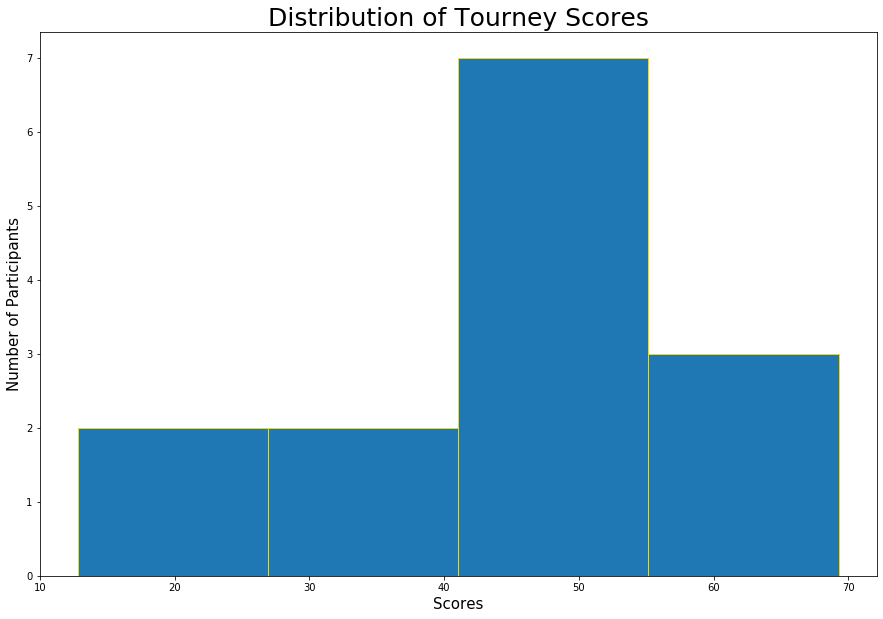

In [2]:
import os, json
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns


def mtt_score(values):
    return int(values[2]) * 4
def to0_score(values):
    return int(values[0]) * 5
def c4_score(values):
    return 20 * (int(values[0]) + int(values[2]) *float(1/12)) / 12  
def snake_score(values):
    return int(values[0]) * float(20/7)
def sim_score(values):
    return int(values[0]) * float(20/7)

path_to_json = 'submissions/'
json_files = [pos_json for pos_json in os.listdir(path_to_json) if pos_json.endswith('.json')]

df = pd.DataFrame(columns = ["Name", "Email", "mttt", "10to0", "c4", "snake", "sim", "score"])

for index, js in enumerate(json_files):
    with open(os.path.join(path_to_json, js)) as json_file:
        json_text = json.load(json_file)
        name = json_text["name"]
        email = json_text["email"]
        mttt = mtt_score(json_text["attachments"]["summary_WLTD"][0][2:].split("_"))
        to0 = to0_score(json_text["attachments"]["summary_WLTD"][1][2:].split("_"))
        c4 = c4_score(json_text["attachments"]["summary_WLTD"][2][2:].split("_"))
        snake = snake_score(json_text["attachments"]["summary_WLTD"][3][2:].split("_"))
        sim = sim_score(json_text["attachments"]["summary_WLTD"][4][2:].split("_"))
        score = mttt + to0 + c4 + snake + sim
        
        df.loc[index] = [name, email, mttt, to0, c4, snake, sim, score]
df

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10
w = 15
n = math.ceil((max(df["score"]) - min(df["score"]))/w)

plt.hist(df["score"], bins = n, ec = "gold")
plt.title("Distribution of Tourney Scores", fontsize = 25)
plt.ylabel("Number of Participants", fontsize = 15)
plt.xlabel("Scores", fontsize = 15)
plt.show()

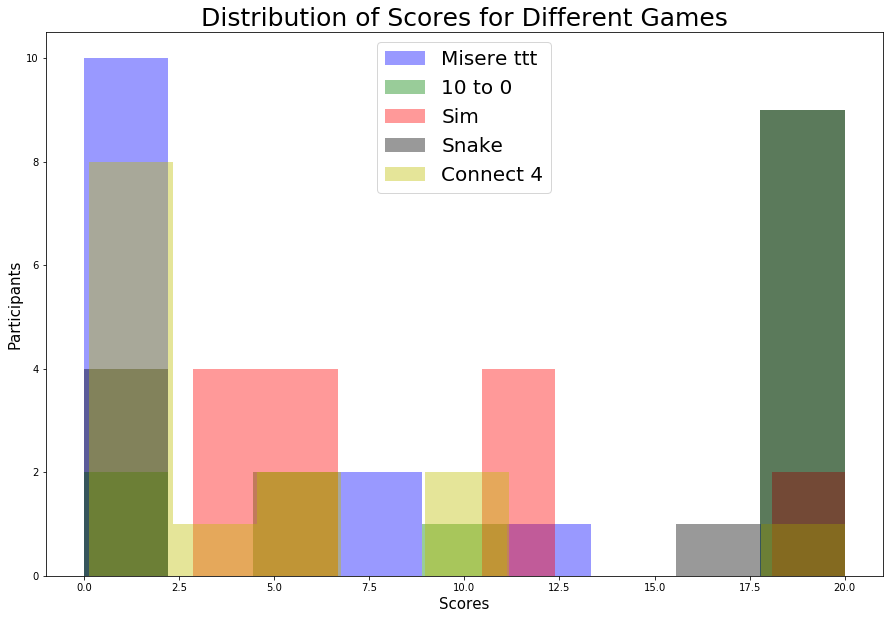

In [3]:
w = 7
n = math.ceil((max(df["score"]) - min(df["score"]))/w)

all_scores = [df["mttt"],df["10to0"],df["c4"],df["snake"],df["sim"]]
sns.distplot(df["mttt"],  color="b", kde= False, label="Misere ttt", bins = n)
sns.distplot(df["10to0"],  color="g", kde= False, label="10 to 0", bins = n)
sns.distplot(df["sim"],  color="r", kde= False, label="Sim", bins = n)
sns.distplot(df["snake"],  color="black", kde= False, label="Snake", bins = n)
sns.distplot(df["c4"],  color="y", kde= False, label="Connect 4", bins = n)
plt.legend(prop={'size': 20})
plt.title('Distribution of Scores for Different Games', fontsize = 25)
plt.xlabel('Scores', fontsize = 15)
plt.ylabel('Participants', fontsize = 15)
plt.show()

# sns.kdeplot(df["10to0"], shade=True, color="b", label="10 to 0", alpha=.5)
# sns.kdeplot(df["sim"], shade=True, color="r", label="Sim", alpha=.5)
# sns.kdeplot(df["snake"], shade=True, color="black", label="Snake", alpha=.5)

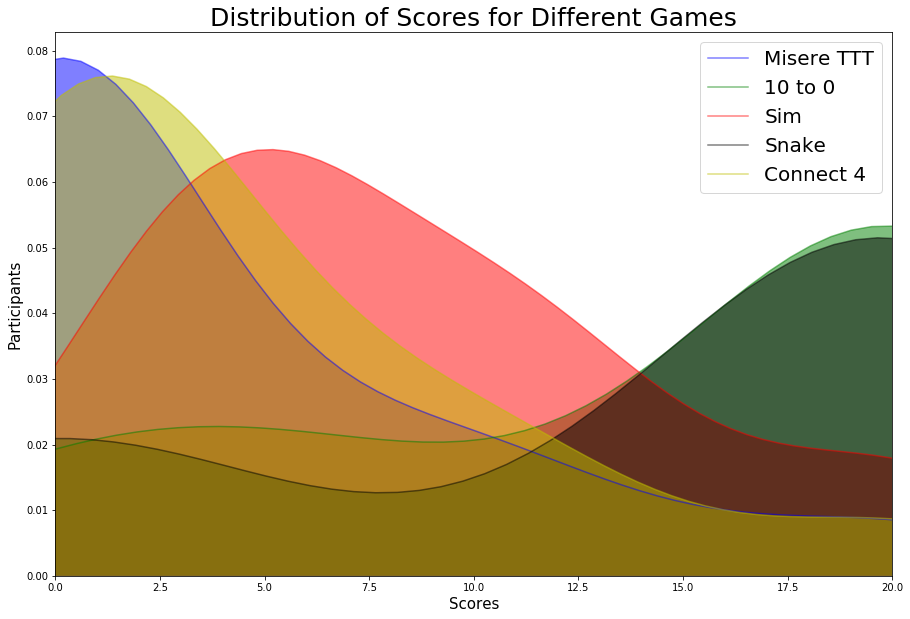

<Figure size 1080x720 with 0 Axes>

In [5]:


sns.kdeplot(df["mttt"], shade=True, color="b", label="Misere TTT", alpha=.5).set(xlim=(0,20))
sns.kdeplot(df["10to0"], shade=True, color="g", label="10 to 0", alpha=.5)
sns.kdeplot(df["sim"], shade=True, color="r", label="Sim", alpha=.5)
sns.kdeplot(df["snake"], shade=True, color="black", label="Snake", alpha=.5)
sns.kdeplot(df["c4"], shade=True, color="y", label="Connect 4", alpha=.5)

plt.legend(prop={'size': 20})
plt.title('Distribution of Scores for Different Games', fontsize = 25)
plt.xlabel('Scores', fontsize = 15)
plt.ylabel('Participants', fontsize = 15)
plt.show()
plt.figure().savefig('plot.jpg')
